In [1]:
!pip install phik

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
from phik.report import plot_correlation_matrix
from phik import phik_matrix

In [2]:
data_dir = Path("../../data/processed")
X_train = pd.read_parquet(data_dir / "X_train.parquet")
y_train = pd.read_parquet(data_dir / "y_train.parquet").squeeze()

df_analysis = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
df_analysis.rename(columns={0: 'FloodProbability'}, inplace=True)

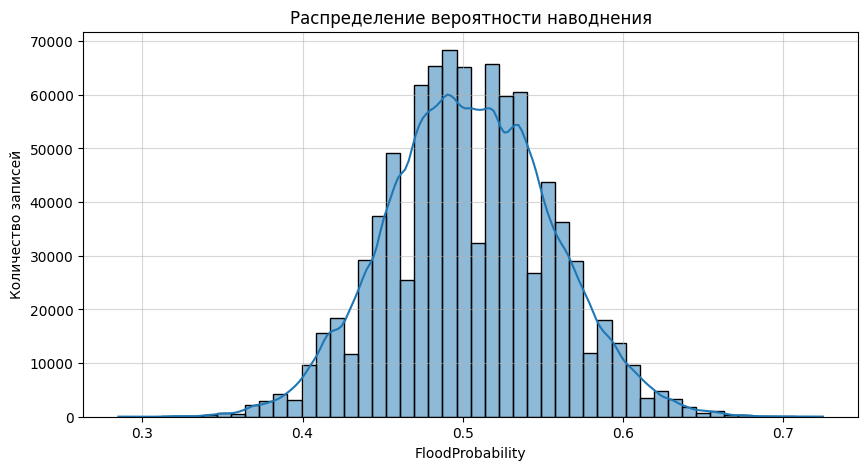

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df_analysis['FloodProbability'], bins=50, kde=True)
plt.title('Распределение вероятности наводнения')
plt.xlabel('FloodProbability')
plt.ylabel('Количество записей')
plt.grid(alpha=0.5)
plt.show()

In [6]:
print(df_analysis['sum_risk'].describe())

count    894365.000000
mean         98.788044
std           8.312940
min          63.000000
25%          93.000000
50%          98.000000
75%         104.000000
max         144.000000
Name: sum_risk, dtype: float64


In [7]:
print(df_analysis['FloodProbability'].describe())

count    894365.000000
mean          0.504493
std           0.051054
min           0.285000
25%           0.470000
50%           0.505000
75%           0.540000
max           0.725000
Name: FloodProbability, dtype: float64


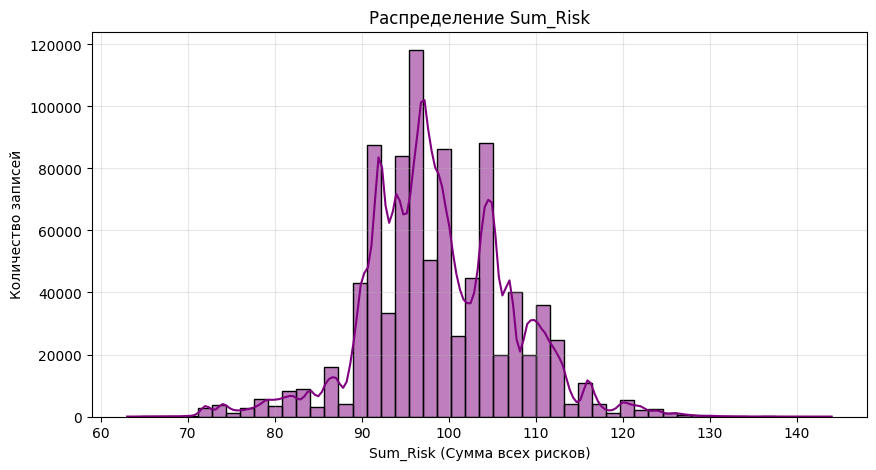

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df_analysis['sum_risk'], bins=50, kde=True, color='purple')
plt.title('Распределение Sum_Risk')
plt.xlabel('Sum_Risk (Сумма всех рисков)')
plt.ylabel('Количество записей')
plt.grid(alpha=0.3)
plt.show()

In [8]:
cols_to_analyze = [col for col in df_analysis.columns if col not in ['id']]
df_corr = df_analysis[cols_to_analyze]

phik_overview = df_corr.phik_matrix()

interval columns not set, guessing: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'sum_risk', 'mean_risk', 'std_risk', 'FloodProbability']


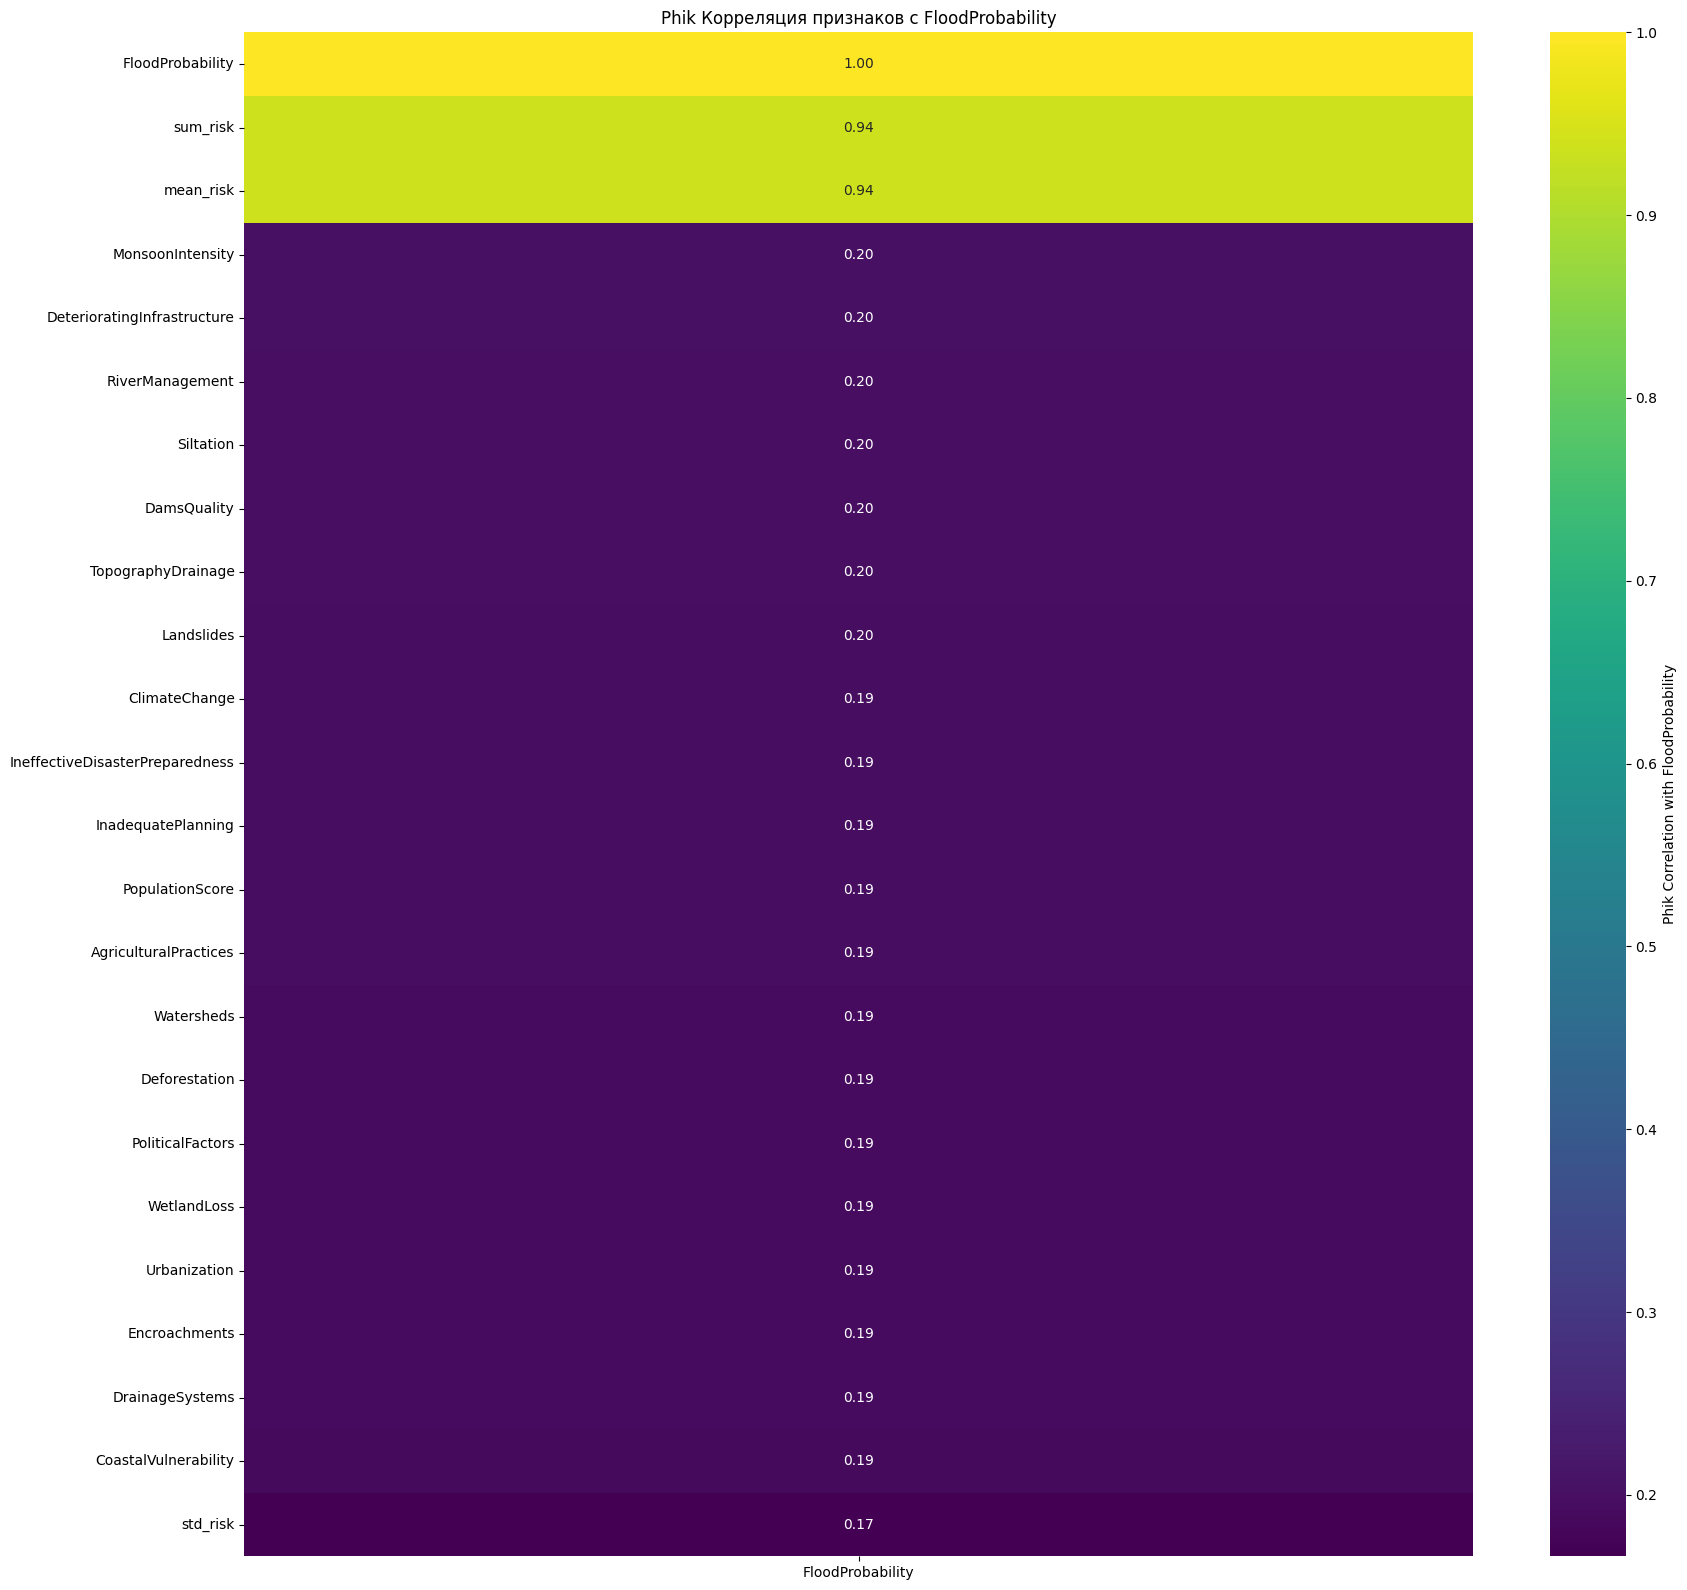

In [9]:
plt.figure(figsize=(18, 16))
sns.heatmap(phik_overview[['FloodProbability']].sort_values(by='FloodProbability', ascending=False),
            annot=True, 
            cmap='viridis',
            fmt=".2f",
            cbar_kws={'label': 'Phik Correlation with FloodProbability'})
plt.title('Phik Корреляция признаков с FloodProbability')
plt.tight_layout()
plt.show()

In [10]:
print(phik_overview.loc[['sum_risk', 'mean_risk', 'std_risk'], 'FloodProbability'])

sum_risk     0.937038
mean_risk    0.937038
std_risk     0.166434
Name: FloodProbability, dtype: float64
